In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import gc

# Any results you write to the current directory are saved as output.

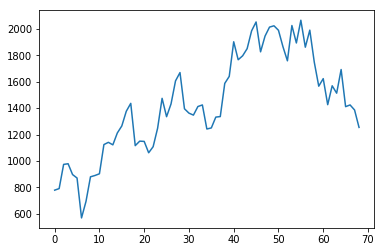

In [57]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('goiania_out_shift_2.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [58]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.layers import Dropout
from pandas import Series

In [59]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [60]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [61]:
# load the dataset
dataframe = pandas.read_csv('goiania_out_shift_2.csv', index_col=0)
dataset = dataframe['2011-01-01':]
dataset = dataset.values
dataset = dataset.astype('float32')

In [62]:
dataset[0:5]

array([[779.],
       [791.],
       [974.],
       [979.],
       [897.]], dtype=float32)

In [63]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [64]:
dataset[0:5]

array([[0.1403743 ],
       [0.14839572],
       [0.2707219 ],
       [0.27406418],
       [0.21925133]], dtype=float32)

In [65]:
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [66]:
look_back = 2
supervised = timeseries_to_supervised(dataset, look_back)
supervised_values = supervised.values

train_size = int(len(supervised_values) * 0.84)
train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]
print(len(train), len(test))
print(supervised_values)

60 12
[[0.         0.         0.1403743 ]
 [0.1403743  0.         0.14839572]
 [0.14839572 0.1403743  0.2707219 ]
 [0.2707219  0.14839572 0.27406418]
 [0.27406418 0.2707219  0.21925133]
 [0.21925133 0.27406418 0.20187163]
 [0.20187163 0.21925133 0.        ]
 [0.         0.20187163 0.08355615]
 [0.08355615 0.         0.20788771]
 [0.20788771 0.08355615 0.21457219]
 [0.21457219 0.20788771 0.22326201]
 [0.22326201 0.21457219 0.37098932]
 [0.37098932 0.22326201 0.38235295]
 [0.38235295 0.37098932 0.3696524 ]
 [0.3696524  0.38235295 0.42981285]
 [0.42981285 0.3696524  0.46524066]
 [0.46524066 0.42981285 0.5394385 ]
 [0.5394385  0.46524066 0.57954544]
 [0.57954544 0.5394385  0.3656417 ]
 [0.3656417  0.57954544 0.38836896]
 [0.38836896 0.3656417  0.3870321 ]
 [0.3870321  0.38836896 0.32954544]
 [0.32954544 0.3870321  0.3602941 ]
 [0.3602941  0.32954544 0.45387703]
 [0.45387703 0.3602941  0.60494655]
 [0.60494655 0.45387703 0.5120321 ]
 [0.5120321  0.60494655 0.57687163]
 [0.57687163 0.5120321

In [67]:
trainX, trainY = train[:, 0:-1], train[:, -1]
testX, testY = test[:, 0:-1], test[:, -1]

In [68]:
trainX, trainY = numpy.array(trainX), numpy.array(trainY)
testX, testY = numpy.array(testX), numpy.array(testY)

In [69]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [70]:
gc.collect()
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
# for i in range(30):
#     model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=0)
#     model.reset_states()
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 9s - loss: 0.3309
Epoch 2/10
 - 1s - loss: 0.1353
Epoch 3/10
 - 1s - loss: 0.0739
Epoch 4/10
 - 1s - loss: 0.0712
Epoch 5/10
 - 1s - loss: 0.0623
Epoch 6/10
 - 1s - loss: 0.0506
Epoch 7/10
 - 1s - loss: 0.0318
Epoch 8/10
 - 1s - loss: 0.0172
Epoch 9/10
 - 1s - loss: 0.0128
Epoch 10/10
 - 1s - loss: 0.0116


In [71]:
# make predictions
# trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
last = trainY
last2 = testX
# trainPredict2 = scaler.inverse_transform(trainPredict)
trainY2 = scaler.inverse_transform([trainY])
testPredict2 = scaler.inverse_transform(testPredict)
testY2 = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print(r2_score(testY2[0],testPredict2[:,0]))

Test Score: 100.98 RMSE
0.7042317414786312


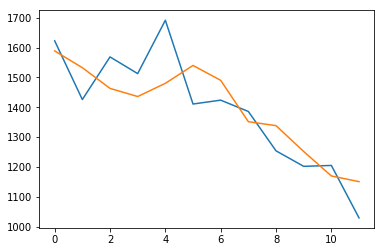

Test MAE: 87.999
Test R2: 0.704
Test MSE: 10196.978
Test RMSE: 100.980


In [72]:
plt.plot(testY2[0])
plt.plot(testPredict2[:,0])
plt.show()
print('Test MAE: %.3f' % mean_absolute_error(testY2[0], testPredict2))
print('Test R2: %.3f' % r2_score(testY2[0],testPredict2))
print('Test MSE: %.3f' % mean_squared_error(testY2[0], testPredict2))
print('Test RMSE: %.3f' % math.sqrt(mean_squared_error(testY2[0], testPredict2)))

In [19]:
print(r2_score(testY2[0],testPredict2))

0.7042592077418781


In [20]:
print(math.sqrt(mean_squared_error(testY2[0], testPredict2)))

100.97539787863909


In [21]:
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(8))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

In [22]:
# model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(12, return_sequences=True))
# model.add(LSTM(12, return_sequences=True))
# model.add(LSTM(12, return_sequences=True))
# model.add(LSTM(4))

In [23]:
# model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(16, return_sequences=True))
# model.add(LSTM(8))
# model.add(Dense(1))

In [24]:
# model.add(LSTM(20, input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(20, return_sequences=True))
# model.add(LSTM(8))

In [25]:
# model.add(LSTM(14, input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(14, return_sequences=True))
# model.add(LSTM(8))

In [27]:
# print(testX[-1:])
# # print(last2)
# model.predict(testX[-1:])

testX[-1][0][1] = testX[-1][0][0]
testX[-1][0][0] = 0.30748665

In [29]:
print(testX[-1:])

[[[0.30748665 0.30748665]]]


In [1200]:
predictions = list()
for i in range(6):
    predict = model.predict(testX[-1:])
    testX[-1][0][1] = testX[-1][0][0]
    testX[-1][0][0] = predict
    predictions.append(predict)

In [1201]:
# print(predictions)
predictions2 = [x[0] for x in predictions]
scaler.inverse_transform(predictions2)

array([[1092.01544915],
       [1062.4928579 ],
       [1070.60153346],
       [1065.31058398],
       [1065.97488965],
       [1064.84695212]])

In [1202]:
testX[-1][0][1] = testX[-1][0][0]
testX[-1][0][0] = 0.30748665
model.predict(testX[-1:])

array([[0.3254359]], dtype=float32)

In [1203]:
testX[-1][0][1] = testX[-1][0][0]
testX[-1][0][0] = 0.40585274
model.predict(testX[-1:])

array([[0.3446468]], dtype=float32)

In [1204]:
scaler.inverse_transform(0.43825415)

array([[1224.62820829]])

In [1205]:
scaler.inverse_transform(0.40585274)

array([[1176.15569988]])

In [1206]:
scaler.inverse_transform(0.39879677)

array([[1165.59996897]])

In [1207]:
neurons = 512                 
activation_function = 'tanh'  
loss = 'mse'                  
optimizer="adam"              
dropout = 0.25                 
batch_size = 12               
epochs = 53                   
window_len = 7               
training_size = 0.8
merge_date = '2016-01-01'

In [1]:

# def build_model(inputs, output_size, neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
#     """
#     inputs: input data as numpy array
#     output_size: number of predictions per input sample
#     neurons: number of neurons/ units in the LSTM layer
#     active_func: Activation function to be used in LSTM layers and Dense layer
#     dropout: dropout ration, default is 0.25
#     loss: loss function for calculating the gradient
#     optimizer: type of optimizer to backpropagate the gradient
#     This function will build 3 layered RNN model with LSTM cells with dripouts after each LSTM layer 
#     and finally a dense layer to produce the output using keras' sequential model.
#     Return: Keras sequential model and model summary
#     """
#     model = Sequential()
#     model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
#     model.add(Dropout(dropout))
#     model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
#     model.add(Dropout(dropout))
#     model.add(LSTM(neurons, activation=activ_func))
#     model.add(Dropout(dropout))
#     model.add(Dense(units=output_size))
#     model.add(Activation(activ_func))
#     model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
#     model.summary()
#     return model
# btc_model = build_model(X_train, output_size=1, neurons=neurons)

In [1215]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('goiania_out_shift_2.csv',index_col=0,parse_dates=True).sort_index()
result = seasonal_decompose(df, model='additive')
print(result.trend)

                    qtd
2012-01-01          NaN
2012-02-01          NaN
2012-03-01          NaN
2012-04-01          NaN
2012-05-01          NaN
2012-06-01          NaN
2012-07-01   877.666667
2012-08-01   906.541667
2012-09-01   930.250000
2012-10-01   952.083333
2012-11-01   983.958333
2012-12-01  1027.458333
2013-01-01  1073.791667
2013-02-01  1115.583333
2013-03-01  1145.750000
2013-04-01  1164.083333
2013-05-01  1179.791667
2013-06-01  1193.500000
2013-07-01  1212.541667
2013-08-01  1235.291667
2013-09-01  1253.333333
2013-10-01  1276.708333
2013-11-01  1303.125000
2013-12-01  1313.625000
2014-01-01  1322.166667
2014-02-01  1340.625000
2014-03-01  1359.833333
2014-04-01  1385.916667
2014-05-01  1406.583333
2014-06-01  1412.250000
...                 ...
2015-07-01  1779.791667
2015-08-01  1836.791667
2015-09-01  1882.166667
2015-10-01  1908.291667
2015-11-01  1911.666667
2015-12-01  1916.458333
2016-01-01  1931.291667
2016-02-01  1944.291667
2016-03-01  1948.083333
2016-04-01  1940